In [1]:
import os
os.chdir('../..')

In [9]:
import numpy as np
import json
import pandas as pd
import time

import statsmodels.api as sm

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

from classes.helpers import *

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

colors = {'ba': (232/255,164/255,29/255), 'rb': (0/255,152/255,205/255)}
labels = {'ba': 'BeerAdvocate', 'rb': 'RateBeer'}

data_folder = '../data/'
save_folder = '../figures/all/2-matching/'

func = [lambda x: np.percentile(x, 10), 
        lambda x: np.percentile(x, 25), 
        lambda x: np.percentile(x, 50), 
        lambda x: np.percentile(x, 75),
        lambda x: np.percentile(x, 90),
        lambda x: np.mean(x),
        lambda x: np.std(x)]

names = ['Quantile 10',
         'Quantile 25',
         'Quantile 50',
         'Quantile 75',
         'Quantile 90',
         'Average',
         'STD']

# Sanity Check for the Matching

## Average rating

In [17]:
min_nbr_ratings = 5
matched = pd.read_csv(data_folder + 'matched/beers.csv', header=[0,1])
matched = matched[(matched['ba']['nbr_ratings'] >= min_nbr_ratings) & (matched['rb']['nbr_ratings'] >= min_nbr_ratings)]

df = {}

df['ba'] = pd.read_csv(data_folder + 'ba/beers.csv')
df['ba'] = df['ba'][df['ba']['nbr_ratings'] >= min_nbr_ratings]

df['rb'] = pd.read_csv(data_folder + 'rb/beers.csv')
df['rb'] = df['rb'][df['rb']['nbr_ratings'] >= min_nbr_ratings]

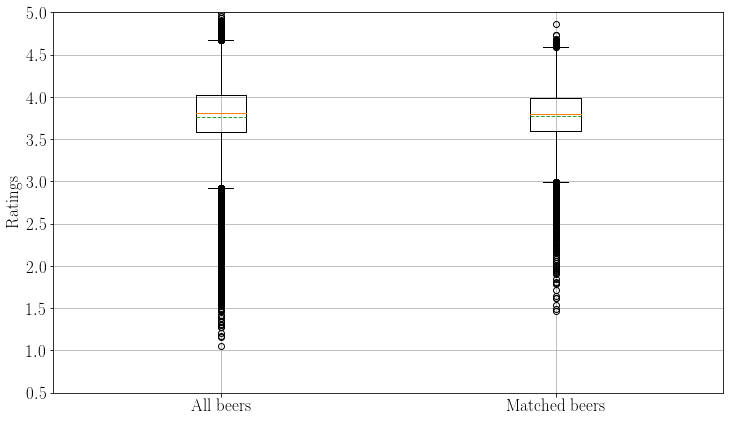

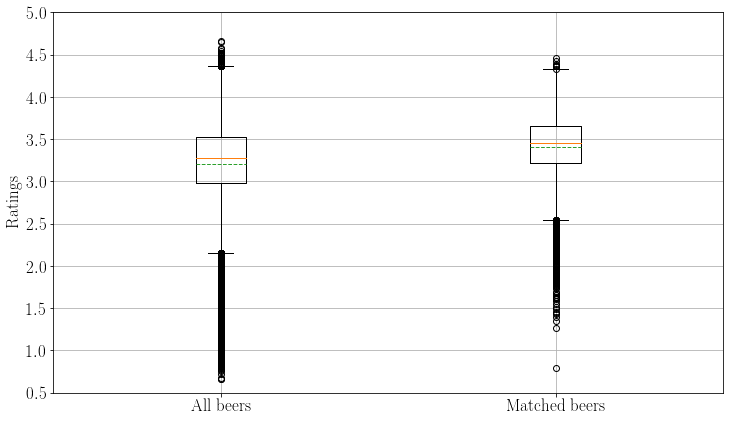

In [18]:
for key in df.keys():    
    # BOXPLOTS
    plt.figure(figsize=(12,7))
    plt.rc('font', family='serif')
    plt.rc('font', size=17)
    
    plt.boxplot([df[key]['avg_computed'], matched[key]['avg_computed']], notch=False, showmeans=True, meanline=True)
    plt.grid()
    plt.ylabel('Ratings')
    plt.xticks([1, 2], ['All beers', 'Matched beers'])
    plt.ylim([0.5, 5])
    plt.savefig(save_folder + 'boxplots_ratings_{}.pdf'.format(key), bbox_inches='tight')
    

## Number ratings per beer

In [19]:
matched = pd.read_csv(data_folder + 'matched/beers.csv', header=[0,1])

df = {}

df['ba'] = pd.read_csv(data_folder + 'ba/beers.csv')
df['rb'] = pd.read_csv(data_folder + 'rb/beers.csv')

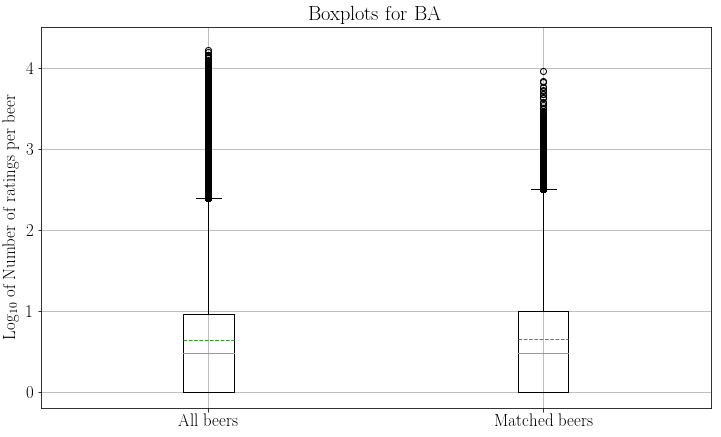

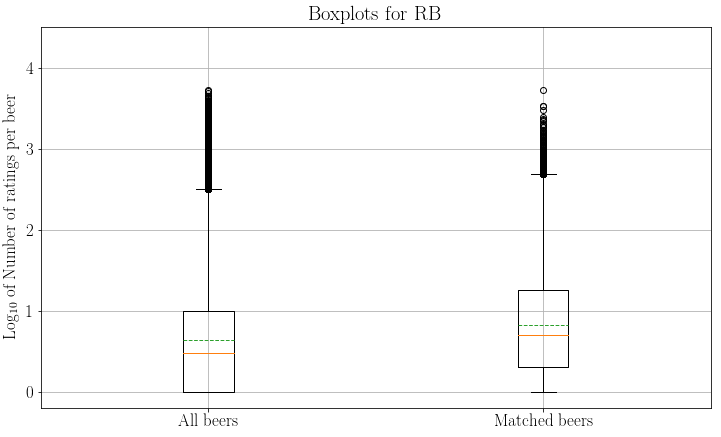

In [20]:
for key in df.keys():   
    arr1 = np.array(df[key]['nbr_ratings'])
    arr1 = arr1[arr1>0]
    
    arr2 = np.array(matched[key]['nbr_ratings'])
    arr2 = arr2[arr2>0]
    
    # BOXPLOTS
    plt.figure(figsize=(12,7))
    plt.rc('font', family='serif')
    plt.rc('font', size=17)
    
    plt.boxplot([np.log10(arr1), np.log10(arr2)], notch=False, showmeans=True, meanline=True)
    plt.grid()
    plt.ylabel('Log$_{10}$ of Number of ratings per beer')
    plt.xticks([1, 2], ['All beers', 'Matched beers'])
    plt.title('Boxplots for {}'.format(key.upper()))
    plt.ylim([-0.2, 4.5])
    plt.savefig(save_folder + 'boxplots_nbr_ratings_{}.pdf'.format(key), bbox_inches='tight')    

## Number beers per brewery

In [13]:
df = {}

df['ba'] = pd.read_csv(data_folder + 'ba/breweries.csv')
df['rb'] = pd.read_csv(data_folder + 'rb/breweries.csv')

matched = pd.read_csv(data_folder + 'matched/breweries.csv', header=[0,1])

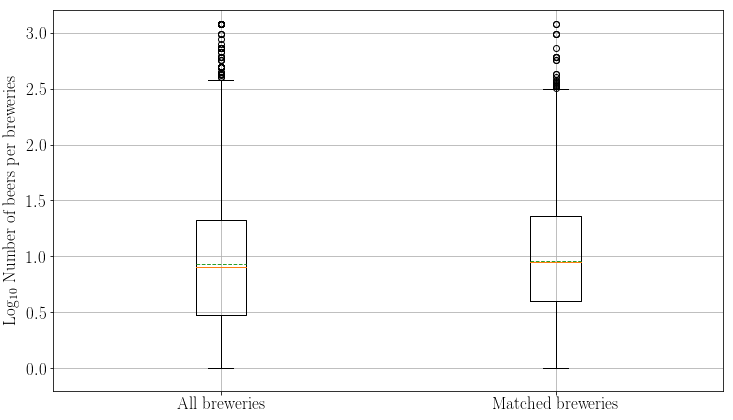

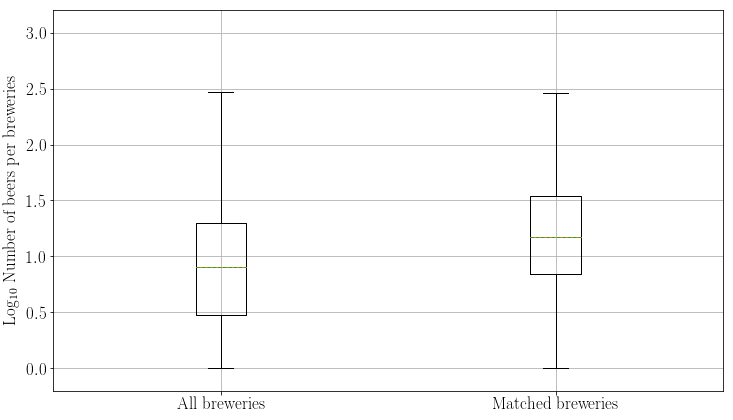

In [16]:
for key in df.keys():    
    # BOXPLOTS
    plt.figure(figsize=(12,7))
    plt.rc('font', family='serif')
    plt.rc('font', size=17)
    
    arr1 = np.array(df[key]['nbr_beers'])
    arr1 = arr1[arr1>0]
    
    arr2 = np.array(matched[key]['nbr_beers'])
    arr2 = arr2[arr2>0]
    
    plt.boxplot([np.log10(arr1), np.log10(arr2)], notch=False, showmeans=True, meanline=True)
    plt.grid()
    plt.ylim([-0.2, 3.2])
    plt.ylabel('Log$_{10}$ Number of beers per breweries')
    plt.xticks([1, 2], ['All breweries', 'Matched breweries'])
    plt.savefig(save_folder + 'boxplots_nbr_beers_breweries_{}.pdf'.format(key), bbox_inches='tight')    

## Numbers breweries per country

In [65]:
matched = pd.read_csv(data_folder + 'matched/breweries.csv', header=[0,1])
ba = pd.read_csv(data_folder + 'ba/breweries.csv')
rb = pd.read_csv(data_folder + 'rb/breweries.csv')

def perc_country(arr, country):
    locs = np.array(arr)
    spec = []
    for l in locs:
        if country in l:
            spec.append(l)

    return len(spec)/len(locs)*100

In [66]:
countries = ['United State', 'Germany', 'England', 'Canada', 'Italy', 'Belgium', 'France', 'Spain', 'Australia', 'Netherlands', 'Switzerland']
for c in countries:
    print('{}:'.format(c))
    print('  Unmatched:')
    print('    BA: {:.1f}'.format(perc_country(ba['location'], c)))
    print('    RB: {:.1f}'.format(perc_country(rb['location'], c)))
    print('  Matched:')
    print('    Both: {:.1f}'.format(perc_country(matched['ba']['location'], c)))
    print()


United State:
  Unmatched:
    BA: 44.4
    RB: 28.6
  Matched:
    Both: 47.8

Germany:
  Unmatched:
    BA: 8.5
    RB: 8.3
  Matched:
    Both: 6.4

England:
  Unmatched:
    BA: 6.1
    RB: 8.8
  Matched:
    Both: 5.8

Canada:
  Unmatched:
    BA: 5.1
    RB: 3.7
  Matched:
    Both: 4.9

Italy:
  Unmatched:
    BA: 2.2
    RB: 4.3
  Matched:
    Both: 2.7

Belgium:
  Unmatched:
    BA: 2.0
    RB: 1.9
  Matched:
    Both: 2.5

France:
  Unmatched:
    BA: 2.4
    RB: 3.5
  Matched:
    Both: 2.3

Spain:
  Unmatched:
    BA: 1.9
    RB: 3.2
  Matched:
    Both: 2.3

Australia:
  Unmatched:
    BA: 2.4
    RB: 2.3
  Matched:
    Both: 2.2

Netherlands:
  Unmatched:
    BA: 1.5
    RB: 2.2
  Matched:
    Both: 2.1

Switzerland:
  Unmatched:
    BA: 0.7
    RB: 2.2
  Matched:
    Both: 0.7

